# Wiki ono (1) tutorial Python notebook

Use this notebook to help you code and calculate answers to the Week 1 tutorial questions.

> To run notebook cells, click inside the block (add to the code or write your own) and press <code>Ctrl+Enter</code>
> If you've never used a Jupyter notebook before, you can practice with the first two blocks of code below

In [1]:
# We'll start by defining a simple function
def hello_world(name):
    # name is a string input
    print('Hello, world this is '+name+'!')

In [2]:
# Now we can practice calling our function - try inputting the code you need below
hello_world('Bec')

Hello, world this is Bec!


### Tutorial begins here

Now that you've practiced, you can use the notebook below for the tutorial. Blocks will add themselves to the notebook automatically, or you can use the '+' button on the top ribbon to add more. You can save your notebook and outputs when you're finished. 

In [3]:
# Often we start by loading any packages we think we might need for our code
# There's none required for this tutorial, but if you're attempting the challenge you might want e.g.:
import pandas as pd
import numpy as np

In [4]:
# Question 1
n_pp = 0.31
n_tn = 0.96
n_dn = 0.94

n_T = n_pp*n_tn*n_dn

print('Approximately {n:.0%} of input energy makes it to customers'.format(n=n_T))

n_tb = 0.85
n_gn = 0.90

n_HL = 1 - (n_pp/(n_tb*n_gn))

print('Approximately {n:.0%} of input energy to the power plant is lost as heat'.format(n=n_HL))

Approximately 28% of input energy makes it to customers
Approximately 59% of input energy to the power plant is lost as heat


In [5]:
# Question 2
# define LCOE equation
def lcoe(cc,om,e,r,n):
    #cc is capital costs in $/yr
    #om is O&M costs in $/yr
    #e is energy generated in MWh/yr
    #r is discount rate
    #n is lifetime
    #lcoe is $/MWh

    #set cost and energy sums to zero to initialise variables
    cost = 0
    energy = 0

    #loop over the lifetime and return lcoe
    for i in range(1,n+1):
        cost += (cc+om)/((1+r)**i)
        energy += e/((1+r)**i)
    return cost/energy

In [6]:
# calculate LCOE for 2a
lifetime = 20
discount = 0.06
cap = 1.2*1000000*10/lifetime
oandm = 50000
gen = 10*8760*0.35

lcoe_wt = lcoe(cap,oandm,gen,discount,lifetime)
print('The LCOE of the proposed project is ${cost:.2f}/MWh'.format(cost=lcoe_wt))

The LCOE of the proposed project is $21.20/MWh


In [7]:
# calculate discount rate vs lifetime for 2b

#create a range of values for discount rate and lifetime
dr = [0.06*0.5, 0.026*0.75, 0.06*0.9, 0.06*1.1, 0.06*1.25, 0.06*1.5]
lt = [10, 15, 18, 22, 25, 30]

#loop through the ranges and output LCOE in each case
for i in range(0,len(dr)):
    lcoe_r = lcoe(cap,oandm,gen,dr[i],20)
    print('at a discount rate = '+str(dr[i])+', the LCOE = ${cost:.2f}/MWh'.format(cost=lcoe_r))
    cap_n = 1.2*1000000*10/lt[i]
    lcoe_n = lcoe(cap_n,oandm,gen,0.06,lt[i])
    print('for a lifetime = '+str(lt[i])+', the LCOE = ${cost:.2f}/MWh'.format(cost=lcoe_n))

at a discount rate = 0.03, the LCOE = $21.20/MWh
for a lifetime = 10, the LCOE = $40.77/MWh
at a discount rate = 0.0195, the LCOE = $21.20/MWh
for a lifetime = 15, the LCOE = $27.72/MWh
at a discount rate = 0.054, the LCOE = $21.20/MWh
for a lifetime = 18, the LCOE = $23.37/MWh
at a discount rate = 0.066, the LCOE = $21.20/MWh
for a lifetime = 22, the LCOE = $19.42/MWh
at a discount rate = 0.075, the LCOE = $21.20/MWh
for a lifetime = 25, the LCOE = $17.29/MWh
at a discount rate = 0.09, the LCOE = $21.20/MWh
for a lifetime = 30, the LCOE = $14.68/MWh


In [10]:
# Challenge
#constant inputs
ltime = 20
c_cost = 1200000*10/ltime
d_rate = 0.06

#variable inputs
om_mean = 50000
om_std = 7000
cf_mean = 0.30
cf_std = 0.04

#initialise an empty list to store computed lcoe values
lcoe_vals = []
for j in range(0, 1000):
    cf_dist = np.random.normal(cf_mean, cf_std, 1000)
    cf_value = np.random.choice(cf_dist)
        
    om_dist = np.random.normal(om_mean, om_std, 1000)
    om_value = np.random.choice(om_dist)
        
    gen_an = 10 * cf_value * 8760
    
    lcoe_i = lcoe(c_cost, om_value, gen_an, d_rate, ltime)
    lcoe_vals.append(lcoe_i)

average_lcoe = np.mean(lcoe_vals)
print('The average LCOE after 1000 simulations is ${cost:.2f}/MWh'.format(cost=average_lcoe))

The average LCOE after 1000 simulations is $25.15/MWh


Text(0.5, 1.0, 'LCOE simulation')

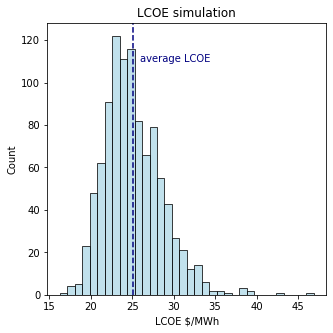

In [16]:
# make histogram
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.histplot(data=lcoe_vals, color='lightblue')
ax.axvline(average_lcoe, ls = '--', color='navy')
ax.text(26, 110, 'average LCOE', color='navy')
ax.set_xlabel('LCOE $/MWh')
ax.set_title('LCOE simulation')